In [68]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

 # Data Preparation

In [69]:
# Read the AMD Historical Closing Prices
amd_data = Path("../Resources/amd_historical.csv")
amd = pd.read_csv(
    amd_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
amd.head()

,Symbol,NOCP
Trade DATE,,
2019-05-13,AMD,26.24
2019-05-10,AMD,27.96
2019-05-09,AMD,27.21
2019-05-08,AMD,27.09
2019-05-07,AMD,26.66


In [70]:
# Read the MU Historical Closing Prices
mu_data = Path("../Resources/mu_historical.csv")
mu = pd.read_csv(
    mu_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
mu.head()

,Symbol,NOCP
Trade DATE,,
2019-05-13,MU,37.38
2019-05-10,MU,38.94
2019-05-09,MU,39.27
2019-05-08,MU,39.75
2019-05-07,MU,40.26


In [71]:
# Create a new pivot table where the columns are the closing prices for each ticker
all_closing_prices = pd.concat([amd, mu], axis="rows", join="inner")
#all_closing_prices = pd.concat([amd, mu], axis="columns", join="inner")

all_closing_prices = all_closing_prices.reset_index()
all_closing_prices = all_closing_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")

##all_closing_prices.columns = [ "amd symbol", "AMD", "mu symbol", "MU" ]
##all_closing_prices.drop(["amd symbol", "mu symbol"], axis="columns", inplace=True)

all_closing_prices.head(200)

Symbol,AMD,MU
Trade DATE,,
2018-05-15,12.45,54.01
2018-05-16,12.82,56.50
2018-05-17,12.82,54.70
2018-05-18,13.00,53.39
2018-05-21,12.99,55.48
...,...,...
2019-02-25,24.71,42.75
2019-02-26,24.21,42.96
2019-02-27,23.48,41.32


 # Portfolio Returns

In [72]:
returns = all_closing_prices.pct_change()
print()
print(returns.tail())

# Calculate Portfolio Returns with an equal amount of each stock
amd_weight = 0.5
mu_weight = 0.5

portfolio_returns = amd_weight * returns["AMD"] + mu_weight * returns["MU"]
print()
print(portfolio_returns.tail())

# Shortcut for calculating returns
weights = [0.5, 0.5]
portfolio_returns = returns.dot(weights)
print()
print(portfolio_returns.tail())


Symbol           AMD        MU
Trade DATE                    
2019-05-07 -0.027717 -0.044386
2019-05-08  0.016129 -0.012668
2019-05-09  0.004430 -0.012075
2019-05-10  0.027563 -0.008403
2019-05-13 -0.061516 -0.040062

Trade DATE
2019-05-07   -0.036052
2019-05-08    0.001731
2019-05-09   -0.003823
2019-05-10    0.009580
2019-05-13   -0.050789
dtype: float64

Trade DATE
2019-05-07   -0.036052
2019-05-08    0.001731
2019-05-09   -0.003823
2019-05-10    0.009580
2019-05-13   -0.050789
dtype: float64


 # Risk Management


Symbol
AMD    0.682623
MU     0.461623
dtype: float64


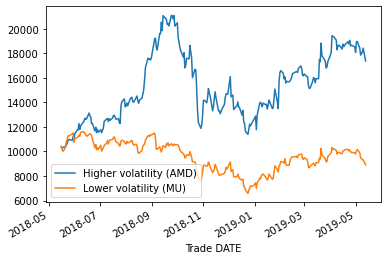

In [75]:
#covariance = returns.cov()
#variance = ?
#sharpe = (covariance * ) / (variance * std(252))

volatility = returns.std() * np.sqrt(252)
print()
print(volatility)

# Higher Volalitity Portfolio (More risk, but potentially higher returns)
initial_investment = 10000
weights = [0.8, 0.2]
portfolio_returns = returns.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
ax = (initial_investment * cumulative_returns).plot()

# Lower Volalitity Portfolio (Less risk, but potentially lower returns)
initial_investment = 10000
weights = [0.2, 0.8]
portfolio_returns = returns.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(ax=ax)

ax.legend(["Higher volatility (AMD)", "Lower volatility (MU)"])